<a href="https://colab.research.google.com/github/beelzebubD/ANPR/blob/main/anpr_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf

In [6]:
# Specify the path to your .tflite model file
model_path = 'anpr_model.tflite'

# Load the TFLite model
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()

In [7]:
# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [8]:
input_details

[{'name': 'normalized_input_image_tensor',
  'index': 175,
  'shape': array([  1, 224, 224,   3], dtype=int32),
  'shape_signature': array([  1, 224, 224,   3], dtype=int32),
  'dtype': numpy.uint8,
  'quantization': (0.0078125, 128),
  'quantization_parameters': {'scales': array([0.0078125], dtype=float32),
   'zero_points': array([128], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [9]:
output_details

[{'name': 'TFLite_Detection_PostProcess',
  'index': 167,
  'shape': array([  1, 100,   4], dtype=int32),
  'shape_signature': array([  1, 100,   4], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'TFLite_Detection_PostProcess:1',
  'index': 168,
  'shape': array([  1, 100], dtype=int32),
  'shape_signature': array([  1, 100], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'TFLite_Detection_PostProcess:2',
  'index': 169,
  'shape': array([  1, 100], dtype=int32),
  'shape_signature': array([  1, 100], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters

In [10]:
import numpy as np
import tensorflow as tf
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow

Detected: [17.50190258026123, 92.50337219238281, 211.51052856445312, 168.14707946777344] 0.58984375 1.0 1.0
Detected: [5.032785415649414, 9.448887825012207, 217.57198905944824, 194.17306900024414] 0.41015625 0.0 0.0


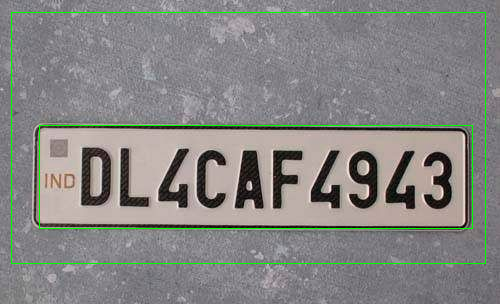

In [18]:
# Load and preprocess the image
image_path = 'numberplate.jpg'
original_image = Image.open(image_path)
image = Image.open(image_path).resize((224, 224))
image_array = np.array(image)

# Ensure the image has the correct shape and type
input_tensor = interpreter.tensor(input_details[0]['index'])
input_tensor_shape = input_tensor().shape
image_array = image_array.reshape(input_tensor_shape).astype(input_tensor().dtype)

# Preprocess the image data
input_tensor()[0] = image_array

# Run inference
interpreter.invoke()

# Get the output tensors
output_locations = interpreter.get_tensor(output_details[0]['index'])
output_classes = interpreter.get_tensor(output_details[1]['index'])
output_scores = interpreter.get_tensor(output_details[2]['index'])
num_detections = interpreter.get_tensor(output_details[3]['index'])

# Draw the detected objects on the original image using OpenCV
image_with_rectangles = np.array(original_image)

# Show the best detections
for i in range(100):
    detection = [
        output_locations[0][i][1] * 224,
        output_locations[0][i][0] * 224,
        output_locations[0][i][3] * 224,
        output_locations[0][i][2] * 224
    ]

    if output_scores[0][i] > 1.0 or output_scores[0][i] < 0.4 or output_classes[0][i] >= 3 or output_classes[0][i] < 0:
        continue

    # Process the detection as needed
    print("Detected:", detection,output_scores[0][i], output_classes[0][i], output_classes[0][i])
    # Scale detection back to the original image size
    detection_scaled = [0,0,0,0]
    i = 0
    for coord in detection :
      if i%2 == 0 :
        detection_scaled[i] = int(coord * (original_image.width / 224))
      else :
        detection_scaled[i] = int(coord * (original_image.height / 224))
      i = i+1


    # Draw a rectangle around the detected object using OpenCV
    cv2.rectangle(
        image_with_rectangles,
        (int(detection_scaled[0]), int(detection_scaled[1])),
        (int(detection_scaled[2]), int(detection_scaled[3])),
        (0, 255, 0),  # Green color
        1  # Thickness of the rectangle
    )

# Display the image with rectangles using OpenCV
cv2_imshow(image_with_rectangles)

In [ ]:
|original_image = Image.open(image_path)